# Řešení kvízu z páté lekce

## Část 1

Pro tento kvíz bude potřebovat data ze souboru insurance.csv, který obsahuje data o pojištěných osobách - age (věk), sex (pohlaví), bmi (index BMI, už jsme ho probírali), children (počet dětí), smoker (jde o kuřáka/kuřačku nebo nekuřáka/nekuřačku), region a charges (poplatky za zdravotnické úkony).

In [16]:
import seaborn as sns
import pandas as pd
data = pd.read_csv("insurance.csv")

### Otázka 1

Pracujeme se sloupcem charges. Napiš příkaz, kterým zjistíš 25%ní kvantil.

In [17]:
import numpy as np
np.quantile(data["charges"], 0.25)

4740.28715

### Otázka 2

Co 25%ní kvantil znamená?

*Jde o číslo, pro které platí, že 25 % hodnot ve sloupci charges je menší než tento kvantil a 75 % větší.*

### Otázka 3

Napiš příkaz, kterým vygeneruješ krabicový graf poplatků za platby za zdravotnické úkony. V grafu zobraz samostatně platby za osoby, které kouří, a osoby, které nekouří. Parametr whis vynech.

<Axes: xlabel='smoker', ylabel='charges'>

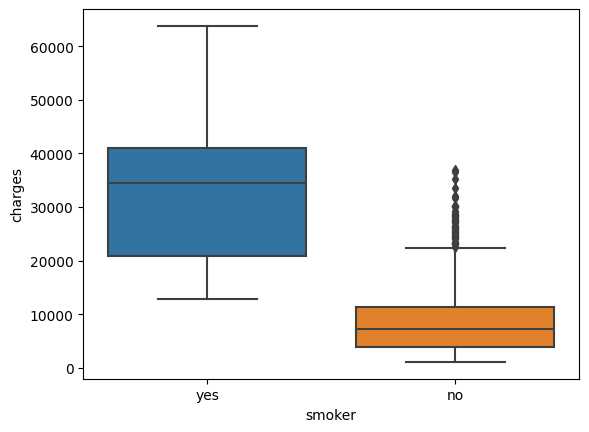

In [18]:
sns.boxplot(data=data, x="smoker", y="charges")

### Otázka 4

Níže je graf vytvořený příkazy
data_no = data[data["smoker"] == "yes"]
sns.histplot(data_no, x="charges", kde=True)
Jak nazýváme modrou čáru, která se ve grafu zobrazí díky kde=True?

*Distrubuční funkce*

<Axes: xlabel='charges', ylabel='Count'>

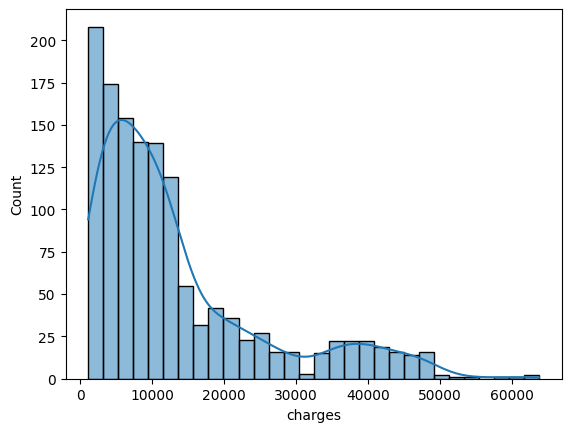

In [19]:
sns.histplot(data, x="charges", kde=True)

### Otázka 5

Podívej se nyní na tvar funkce se stejným názvem, kterou jsme si ukazovali pro normální rozdělení. Které z následujících tvrzení je pravdivé?

*Z grafu se zdá, že data nemají normální rozdělení, protože funkce nemá symestrický tvar. Pro normální rozdělení funkce symetrický tvar měla.*

### Otázka 6

Uvažujme, že bychom chtěli ověřit hypotézu normality pro sloupec bmi v tabulce data (tj. pro všechny pojištěnce). Zadej příkaz, kterým toto provedeme.

In [20]:
from scipy import stats
stats.normaltest(data["bmi"])

NormaltestResult(statistic=17.581447872784118, pvalue=0.0001521377897266011)

Pozn. alternativně je možné použít Shappiro-Wilk test. Ten jsme si na lekci neukazovali, ale jde též o test normality.

In [21]:
stats.shapiro(data["bmi"])

ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)

### Otázka 7

Nyní napiš, jak bychom na základě výsledků testu rozhodli o normalitě dat. Uvažujeme hladinu významnosti 5 %.

*pvalue=0.0001521377897266011  = 0.15 % < 5%, tj. zamítáme nulovou hypotézu, data nemají normální rozdělení*

**Zdůvodnění**

Testy nomality mají následující hypotézy:

- H0: Data mají normální rozdělení.
- H1: Data nemají normální rozdělení.

Dále platí obecné pravidlo, že pokud je p-hodnota menší než hladina významnosti (my používáme obvyklou hodnotu 0.05), zamítáme H0. Protože zamítáme H0, přijímáme H1. Data tedy nemají normální rozdělení.

### Otázka 8

Které z následujících tvrzení je pravdivé?

*Pokud data nemají normální rozdělení, můžeme pro test hypotézy o shodě středních hodnot použít Mann Whitney U test.*

### Otázka 9

Co platí o tzv. neparametrických testech?

*Neparametrické testy mají obvykle volnější předpoklady než parametrické.*

### Otázka 10

Nyní uvažujme, že bychom chtěli porovnat průměrné platby za pojištěnce dle regionu a rozhodnout, jestli je mezi nimi statisticky významný rozdíl. Podívej se, kolik unikátních hodnot máme ve sloupci region. Můžeme použít dvouvýběrový test?

*Ne*

**Zdůvodnění:**

Podívejme se nejprve na to, jaké máme regiony.

In [22]:
data["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Máme více než 2 regiony, to znamená více než 2 výběr. Z toho důvodu nemůžeme použít dvouvýběrový test, ale je třeba použít testy pro 3 a více výběrů.

**Poznámka:** Teoreticky je možné použít dvouvýběrový t-test opakovaně, to si ale vyžádá korekci používané hladiny významnosti, což je poměrně složitý postup. Zkusím k tomu dohledat nějaký zdroj.

### Bonusová otázka

Chceme zjistit, jestli je statisticky významný rozdíl mezi průměrnými platbami za pojštěnce v rámci regionů. Zjisti (například ze seznamu statistických testů v lekci) jméno nějakého statistického testu, který bychom mohli použít. Neřeš, jestli mají data normální rozdělení, a vyber test bez ohledu na předpoklady.

*Mezi testy, které umožňují testovat hypotézy o shodě průměrů mezi třemi a více průměry, patří ANOVA test a Kruskal-Wallis test.*